# This should automatically analyze a text file of the data from the gyroscope/accelerometer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')

In [2]:
path = 'AccelGyro Test.txt' # change to be the name of the file
# also had to delete the first and last row from the .txt file itself

In [3]:
all_data = np.genfromtxt(path, delimiter = '\t') 
# turn all the data into numpy arrays
# there is likely a much faster way to do this but I don't care (yet)
count = all_data[:,0]
timestamp = all_data[:,1]
temp = all_data[:,2]
x_accel = all_data[:,3]
y_accel = all_data[:,4]
z_accel = all_data[:,5]
x_gyro = all_data[:,6]
y_gyro = all_data[:,7]
z_gyro = all_data[:,8]

In [4]:
# make the residual arrays for plotting
x_a_resid = np.array(x_accel - np.average(x_accel))
y_a_resid = np.array(y_accel - np.average(y_accel))
z_a_resid = np.array(z_accel - np.average(z_accel))
x_g_resid = np.array(x_gyro - np.average(x_gyro))
y_g_resid = np.array(y_gyro - np.average(y_gyro))
z_g_resid = np.array(z_gyro - np.average(z_gyro))

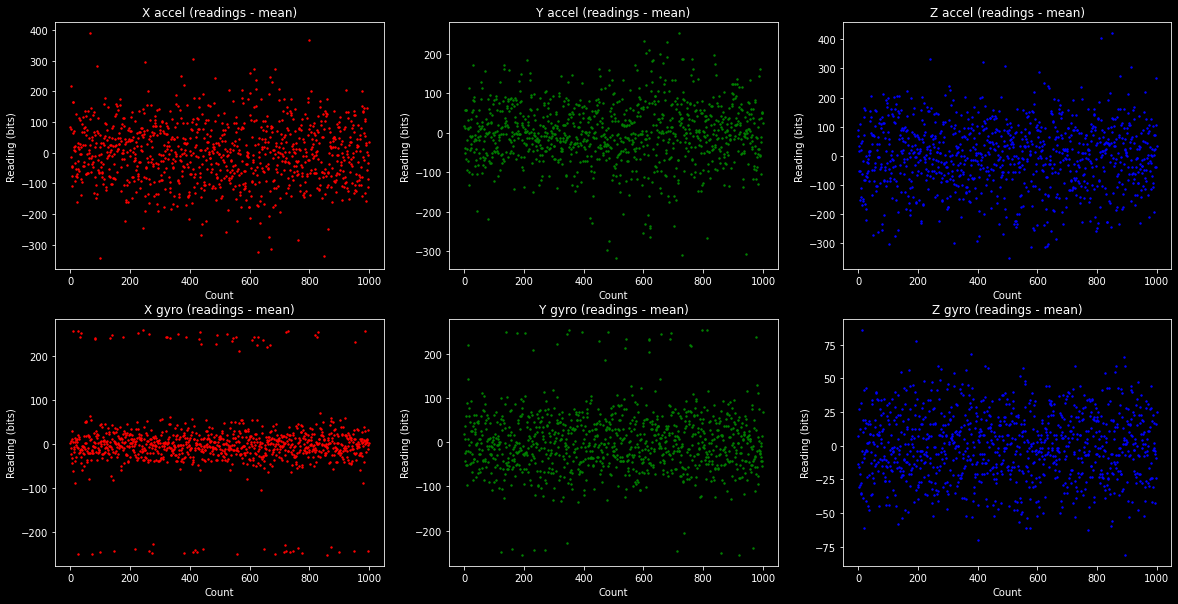

In [5]:
# now make the plots
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].scatter(count, x_a_resid, c = 'r', s= 2)
ax[0,1].scatter(count, y_a_resid, c = 'g', s= 2)
ax[0,2].scatter(count, z_a_resid, c = 'b', s= 2)

ax[1,0].scatter(count, x_g_resid, c = 'r', s = 2)
ax[1,1].scatter(count, y_g_resid, c = 'g', s = 2)
ax[1,2].scatter(count, z_g_resid, c = 'b', s = 2)

ax[0,0].set_title('X accel (readings - mean)')
ax[0,1].set_title('Y accel (readings - mean)')
ax[0,2].set_title('Z accel (readings - mean)')

ax[1,0].set_title('X gyro (readings - mean)')
ax[1,1].set_title('Y gyro (readings - mean)')
ax[1,2].set_title('Z gyro (readings - mean)')

for x in ax.flat:
    x.set(xlabel='Count', ylabel='Reading (bits)')

In [6]:
# Now the next thing we want to do is fit the data
# the data I'm currently looking at however looks too noisy
# thus, I will import a different file of a clearer sine wave so I can practice curve fitting